<a href="https://colab.research.google.com/github/Meowmixforme/Kaggle_Machine_Learning_Projects/blob/main/Project%203%20Exoplanet%20Hunting%20Using%20Machine%20Learning/Exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exoplanet Hunting

Author: James Fothergill

Import Packages

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

Getting the data

In [52]:
train_df = pd.read_csv("/content/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [53]:
# Shape of the training df

train_df.shape

(5087, 3198)

Check for missing values (there are none)

In [54]:
# Display the rows with null values in df

train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

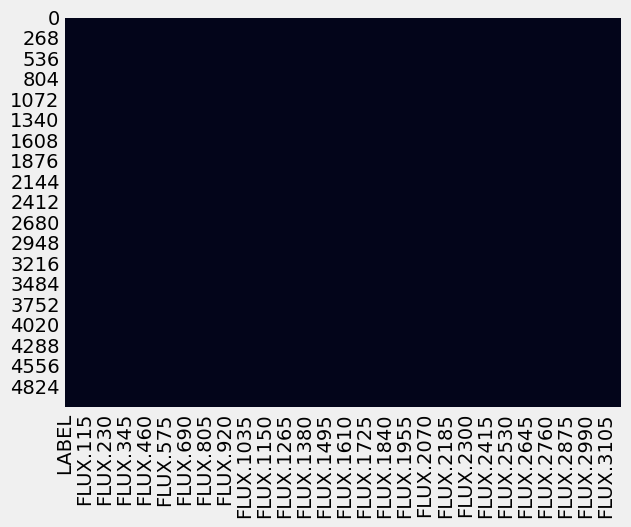

In [55]:
# Display null values in train df
sns.heatmap(train_df.isnull(), cbar=False)

Decoding labels in the data

In [56]:
# Check how many labels are present in train df

train_df['LABEL'].value_counts()

,count
LABEL,
1,5050
2,37


In [57]:
# Extract the index for the stars labelled as 2

list(train_df[train_df['LABEL'] ==2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

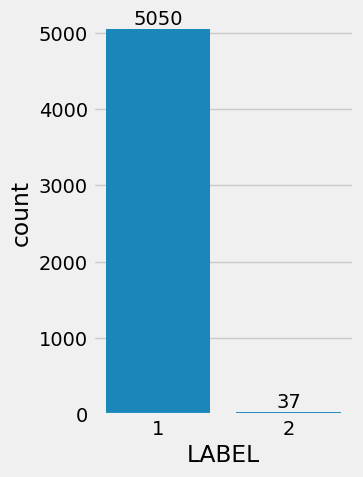

In [58]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x='LABEL', data=train_df) # Specify 'x=' for the column
ax.bar_label(ax.containers[0])
plt.show()

Replacing the labels

In [59]:
# Replacing labels

train_df['LABEL'] = train_df['LABEL'].replace({2: 1, 1: 0})
train_df.LABEL.unique()

array([1, 0])

In [60]:
plot_df = train_df.drop(columns=['LABEL'], axis=1)
plot_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


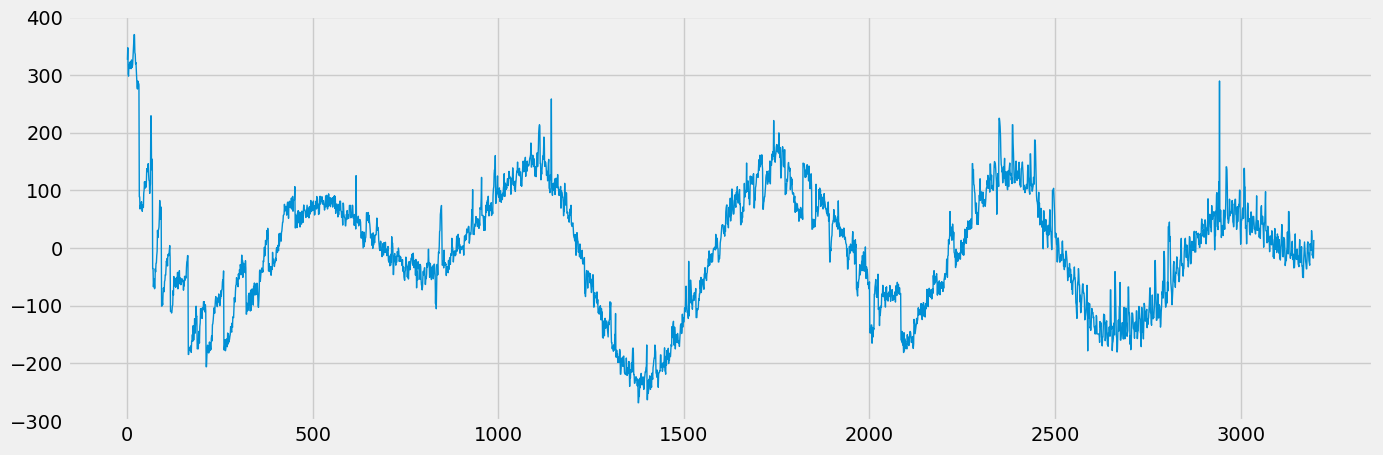

In [61]:
# Plot a random star from the plot df

time = range(1, 3198)
flux_val = plot_df.iloc[3,:].values
plt.figure(figsize=(15,5))
plt.plot(time, flux_val, linewidth = 1)
plt.show()

Removing outliers

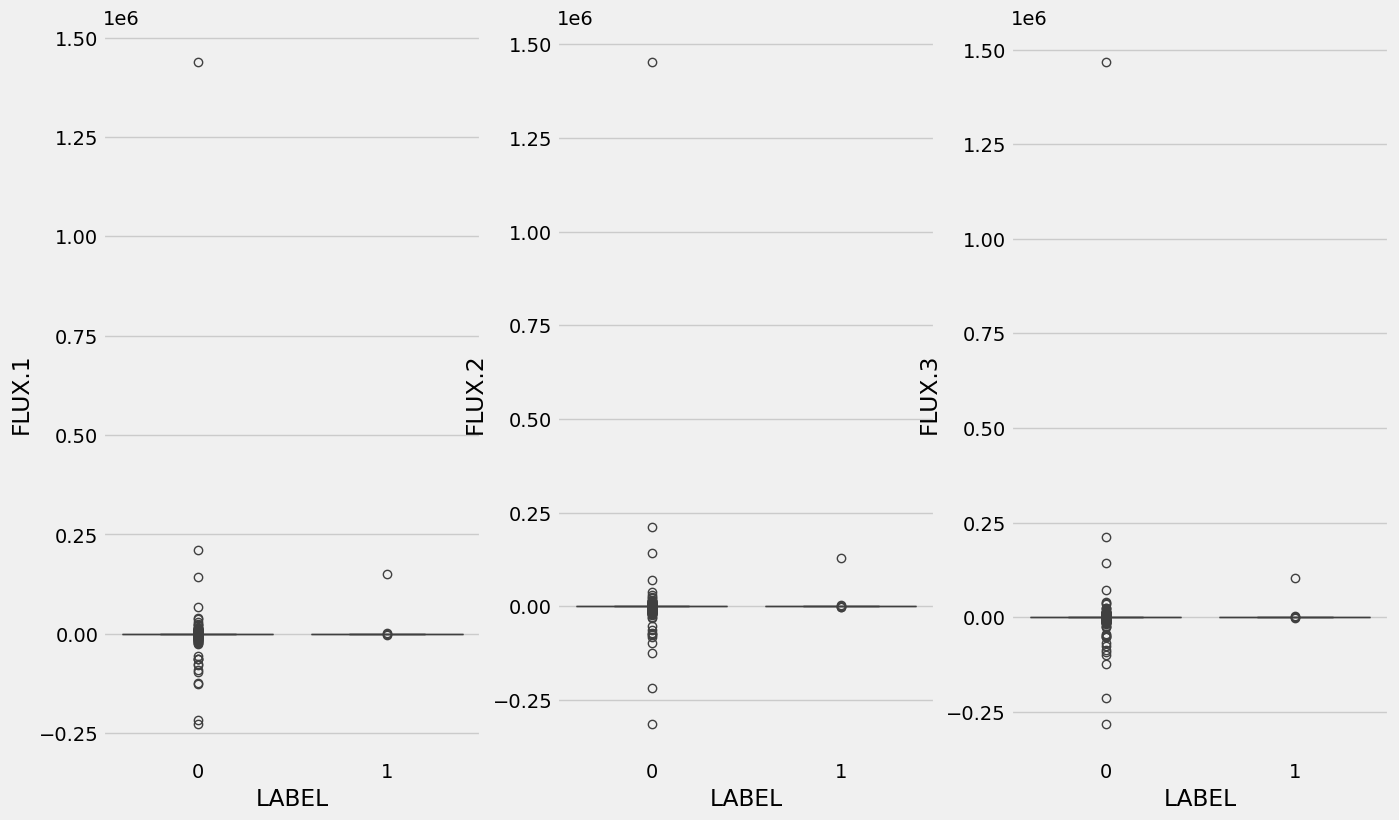

In [62]:
plt.figure(figsize = (20, 9))
for i in range (1, 4):
  plt.subplot(1, 4, i)
  sns.boxplot(data= train_df, x= 'LABEL', y= 'FLUX.' + str(i))

In [63]:
# Dropping outliers

train_df.drop(train_df[train_df['FLUX.2'] > 0.25e6].index, axis=0, inplace=True)

<Axes: xlabel='LABEL', ylabel='FLUX.606'>

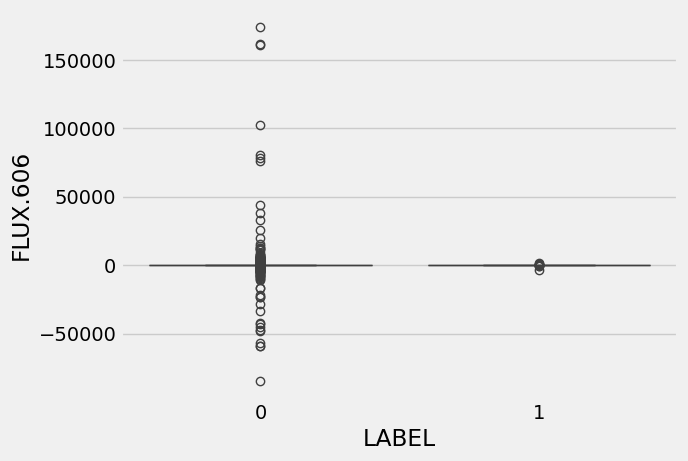

In [64]:
sns.boxplot(data= train_df, x= 'LABEL', y= 'FLUX.' + str(np.random.randint(1000)))

Splitting data into Train / Test

In [65]:
# Extracing independent (x) and dependent (y) features from train df

x = train_df.drop(columns=['LABEL'], axis=1)
y = train_df['LABEL']

 Oversample the whole dataset (train + test) - this is NOT realistic for a real-world evaluation or typically recommended,
 but is done here for demonstration and to show that the model can learn to detect the minority class at all.

In [66]:
# Extracting independent (x) and dependent (y) features from train df
x = train_df.drop(columns=['LABEL'], axis=1)
y = train_df['LABEL']

# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Random oversample the training set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [67]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

# Fit the scaler on the oversamples training data
sc = StandardScaler()
x_train_ros_sc = sc.fit_transform(x_train_ros)
x_test_sc = sc.transform(x_test)

Feature scaling

In [68]:
np.min(x_train_sc), np.max(x_train_sc)

(np.float64(-58.042790882924145), np.float64(59.104063935071586))

<Axes: xlabel='LABEL'>

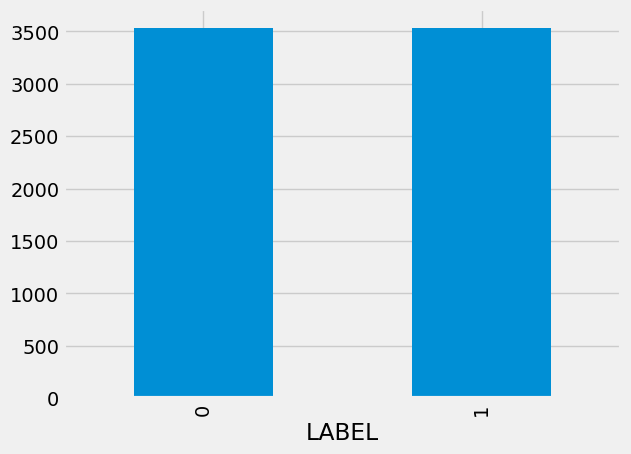

In [69]:
y_train_ros.value_counts().plot(kind='bar')


In [70]:
from collections import Counter
print('Original training set shape:', Counter(y_train))
print('Resampled training set shape:', Counter(y_train_ros))

Original training set shape: Counter({0: 3534, 1: 26})
Resampled training set shape: Counter({0: 3534, 1: 3534})


Dimensionality reduction

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_ros_sc)
x_test_pca = pca.transform(x_test_sc)

KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Fit KNN on PCA-reduced, oversampled, scaled train set
knn_clsfr = KNC(n_neighbors=2, metric='minkowski', p=2)
knn_clsfr.fit(x_train_pca, y_train_ros)

# Predict probabilities on PCA-reduced, scaled test set
y_knn_proba = knn_clsfr.predict_proba(x_test_pca)[:, 1]

# Set a custom threshold for classifying as class 1 (e.g., 0.1)
custom_threshold = 0.05
pred_custom = (y_knn_proba > custom_threshold).astype(int)

print(f"Validation accuracy of KNN (threshold={custom_threshold}):", accuracy_score(y_test, pred_custom))
print("Confusion Matrix:", confusion_matrix(y_test, pred_custom))
print("Classification report:\n", classification_report(y_test, pred_custom, digits=4))

Validation accuracy of KNN (threshold=0.05): 0.9882044560943644
Confusion Matrix: [[1507    8]
 [  10    1]]
Classification report:
               precision    recall  f1-score   support

           0     0.9934    0.9947    0.9941      1515
           1     0.1111    0.0909    0.1000        11

    accuracy                         0.9882      1526
   macro avg     0.5523    0.5428    0.5470      1526
weighted avg     0.9870    0.9882    0.9876      1526



Choosing value of K with minimum error

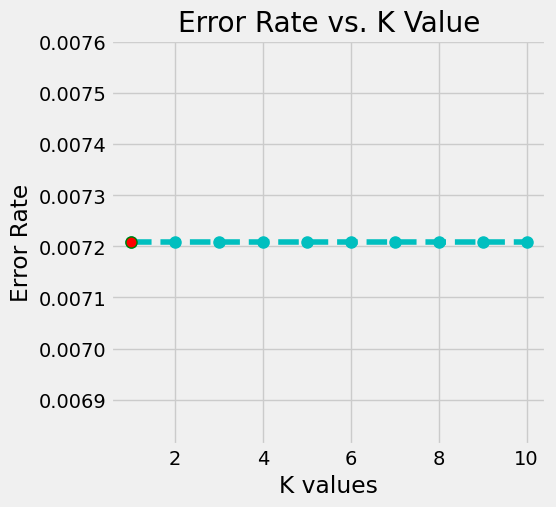

In [77]:
err_rate = []

for K in range (1, 11):
  knn_clsfr = KNC(n_neighbors=K)
  knn_clsfr.fit(x_train_ros, y_train_ros)
  pred_i = knn_clsfr.predict(x_test_sc)
  err_rate.append(np.mean(pred_i != y_test))

# Find the K value with the minimum error
arg, val = err_rate.index(min(err_rate)), min(err_rate)

# Plot the error rate vs. K value
plt.figure(figsize=(5,5))
plt.plot(range(1,11), err_rate, 'co--', markersize = 8)
plt.plot(arg+1, val, marker = 'o', markersize = 8, markerfacecolor = 'r', markeredgecolor = 'g')
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()


Random Forest


Random Forest Classifier Results (PCA-reduced, Oversampled Train, threshold=0.02):

Validation accuracy: 0.8807339449541285

Confusion Matrix:
 [[1339  176]
 [   6    5]]

Classification report:
               precision    recall  f1-score   support

           0     0.9955    0.8838    0.9364      1515
           1     0.0276    0.4545    0.0521        11

    accuracy                         0.8807      1526
   macro avg     0.5116    0.6692    0.4942      1526
weighted avg     0.9886    0.8807    0.9300      1526


AUC-ROC: 0.7519051905190519


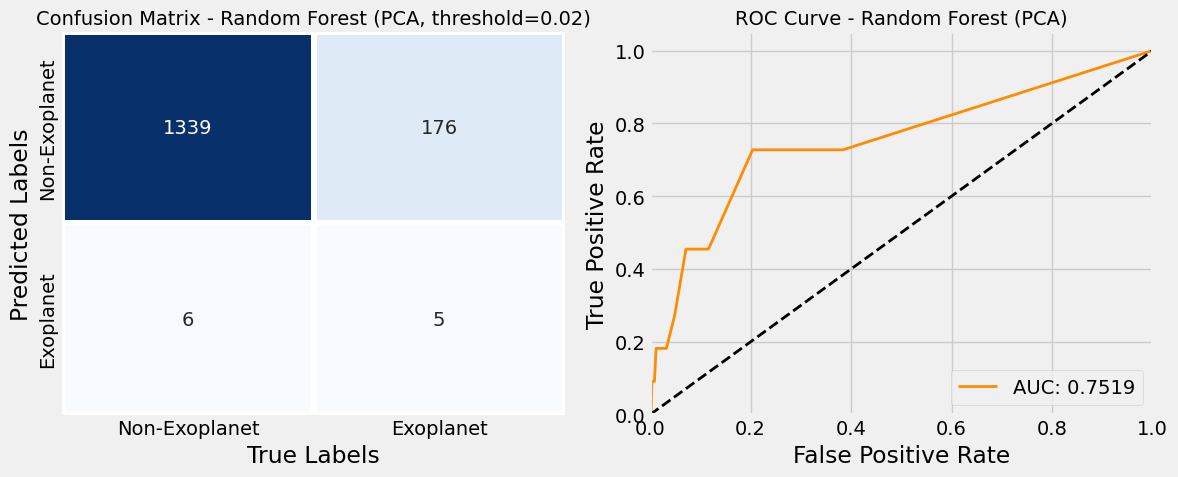

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the PCA-reduced, oversampled, scaled training data
rf_classifier.fit(x_train_pca, y_train_ros)

# Predict probabilities on the PCA-reduced, scaled test data
y_rf_proba = rf_classifier.predict_proba(x_test_pca)[:, 1]

# Set a custom threshold for classifying as class 1 (e.g., 0.1, can be tuned)
custom_threshold = 0.02
y_pred_rf_custom = (y_rf_proba > custom_threshold).astype(int)

print("\nRandom Forest Classifier Results (PCA-reduced, Oversampled Train, threshold={:.2f}):".format(custom_threshold))
print("\nValidation accuracy:", accuracy_score(y_test, y_pred_rf_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf_custom, digits=4))

# Calculate and print AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_rf_proba)
auc_roc = auc(fpr, tpr)
print("\nAUC-ROC:", auc_roc)

# Optional: Plot Confusion Matrix and ROC Curve
plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_custom), annot=True, cmap="Blues", fmt="d", linewidths=3, cbar=False,
            xticklabels=['Non-Exoplanet', 'Exoplanet'], yticklabels=['Non-Exoplanet', 'Exoplanet'])
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Random Forest (PCA, threshold={:.2f})".format(custom_threshold), fontsize=14)

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=("AUC: {:.4f}".format(auc_roc)), color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (PCA)', fontsize=14)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

XGBoost

AUC-ROC (XGBoost): 0.7943594359435944

XGBoost Results (threshold = 0.01):
Validation accuracy: 0.9750982961992136
Confusion Matrix:
 [[1487   28]
 [  10    1]]
Classification report:
               precision    recall  f1-score   support

           0     0.9933    0.9815    0.9874      1515
           1     0.0345    0.0909    0.0500        11

    accuracy                         0.9751      1526
   macro avg     0.5139    0.5362    0.5187      1526
weighted avg     0.9864    0.9751    0.9806      1526

[LightGBM] [Info] Number of positive: 3534, number of negative: 3534
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 7068, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positiv

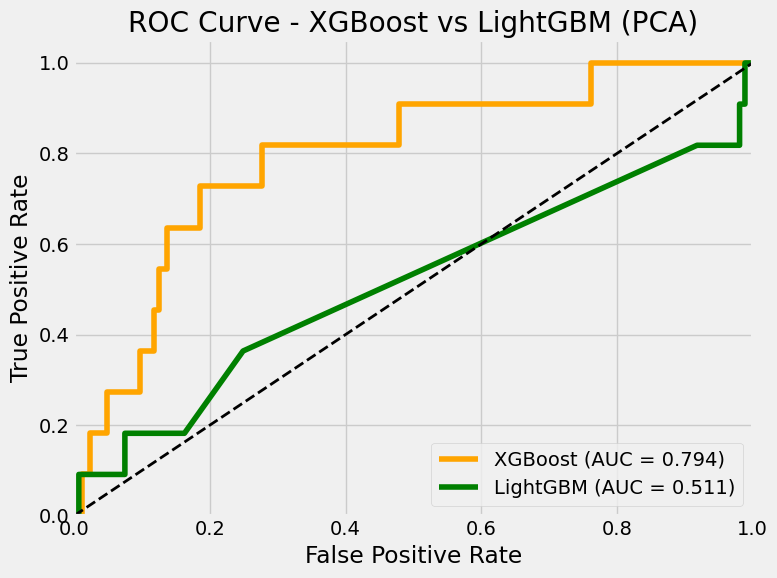

In [82]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt

# XGBoost with class_weight workaround using scale_pos_weight
neg_count = (y_train_ros == 0).sum()
pos_count = (y_train_ros == 1).sum()
scale_pos_weight = neg_count / pos_count if pos_count > 0 else 1

xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)
# Use PCA-reduced data
xgb.fit(x_train_pca, y_train_ros)

# Predict probabilities and use custom threshold
y_pred_xgb_proba = xgb.predict_proba(x_test_pca)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC-ROC (XGBoost):", auc_xgb)

custom_threshold = 0.01
y_pred_xgb_custom = (y_pred_xgb_proba > custom_threshold).astype(int)
print(f"\nXGBoost Results (threshold = {custom_threshold}):")
print("Validation accuracy:", accuracy_score(y_test, y_pred_xgb_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_custom))
print("Classification report:\n", classification_report(y_test, y_pred_xgb_custom, digits=4))

# LightGBM with class_weight='balanced'
lgbm = LGBMClassifier(n_estimators=100, random_state=42, class_weight='balanced')
lgbm.fit(x_train_pca, y_train_ros)
y_pred_lgbm_proba = lgbm.predict_proba(x_test_pca)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_lgbm_proba)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
print("AUC-ROC (LightGBM):", auc_lgbm)

y_pred_lgbm_custom = (y_pred_lgbm_proba > custom_threshold).astype(int)
print(f"\nLightGBM Results (threshold = {custom_threshold}):")
print("Validation accuracy:", accuracy_score(y_test, y_pred_lgbm_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_custom))
print("Classification report:\n", classification_report(y_test, y_pred_lgbm_custom, digits=4))

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', color='orange')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost vs LightGBM (PCA)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Balanced RandomForest

In [83]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt

# Fit on PCA-reduced, scaled, original (not oversampled) training data
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(x_train_pca, y_train)  # y_train is the original imbalanced labels

# Predict probabilities on PCA test set
y_pred_brf_proba = brf.predict_proba(x_test_pca)[:, 1]

# Choose a custom threshold (e.g., 0.1)
custom_threshold = 0.1
y_pred_brf_custom = (y_pred_brf_proba > custom_threshold).astype(int)

# Metrics
print(f"\nBalancedRandomForest Results (threshold = {custom_threshold}):")
print("Validation accuracy:", accuracy_score(y_test, y_pred_brf_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_brf_custom))
print("Classification report:\n", classification_report(y_test, y_pred_brf_custom, digits=4))

# ROC Curve
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_pred_brf_proba)
auc_brf = auc(fpr_brf, tpr_brf)
print("AUC-ROC (BalancedRandomForest):", auc_brf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_brf, tpr_brf, label=f'BalancedRF (AUC = {auc_brf:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BalancedRandomForest (PCA)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [7068, 3560]

tomorrow dimensionality reduction and tree-based importance